In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import seaborn as sns
import re as re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from subprocess import check_output

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split,KFold
from sklearn.metrics.classification import classification_report,accuracy_score


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_path = "E:\Analytics_Vidya\Student_Hunt\\train_pCWxroh.csv"
train = pd.read_csv(data_path)
#train = pd.read_csv("../input/train.csv")
data_path = "E:\Analytics_Vidya\Student_Hunt\\test_bKeE5T8.csv"
test = pd.read_csv(data_path)
#test = pd.read_csv("../input/test.csv")

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d%H')
train.ID = train.ID.astype(str)
train['ID'] = train['ID'].apply(dateparse)
#data = pd.read_csv('E:\Analytics_Vidya\Student_Hunt\\train_pCWxroh.csv', parse_dates='ID',date_parser=dateparse)

In [4]:
newtrain = train.set_index('ID')

In [5]:
print(newtrain.head())

                     Count
ID                        
2011-10-01 00:00:00    135
2011-10-01 01:00:00     96
2011-10-01 02:00:00    111
2011-10-01 03:00:00    102
2011-10-01 04:00:00     54


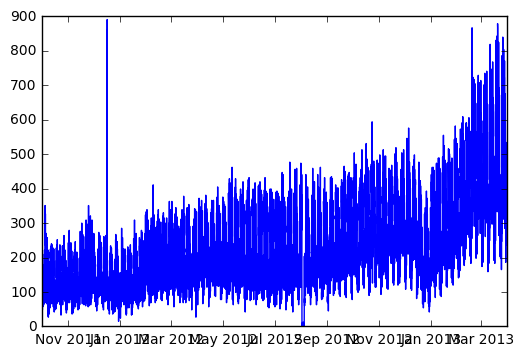

In [6]:
%matplotlib inline
plt.plot(newtrain)

In [7]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

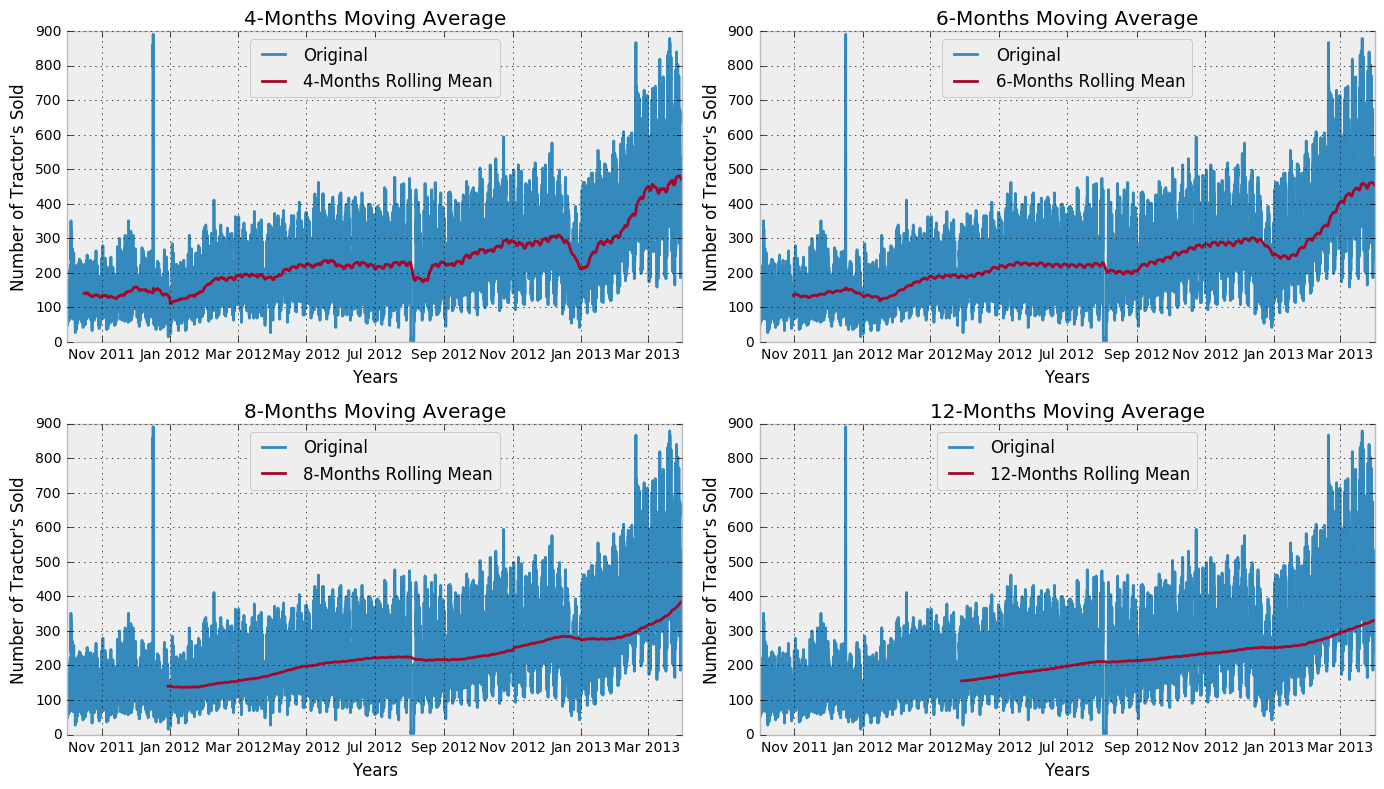

In [8]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(newtrain.index, newtrain, label='Original')
axes[0][0].plot(newtrain.index, newtrain.rolling(window=24*15).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(newtrain.index, newtrain, label='Original')
axes[0][1].plot(newtrain.index, newtrain.rolling(window=30*24).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(newtrain.index, newtrain, label='Original')
axes[1][0].plot(newtrain.index, newtrain.rolling(window=3*24*30).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(newtrain.index, newtrain, label='Original')
axes[1][1].plot(newtrain.index, newtrain.rolling(window=6*24*30).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

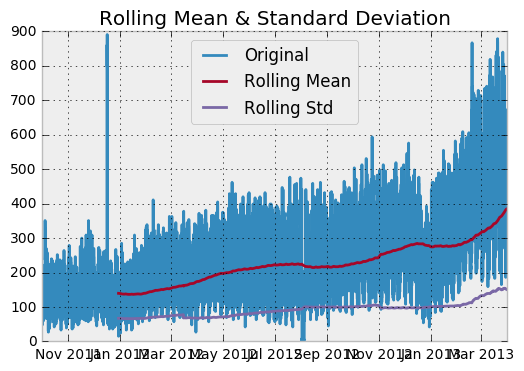

In [9]:
rolmean = newtrain.rolling(window=3*24*30).mean()
rolstd = newtrain.rolling(window=3*24*30).std()

#Plot rolling statistics:
orig = plt.plot(newtrain, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(newtrain, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [ ]:
decomposition = sm.tsa.seasonal_decompose(newtrain, model='multiplicative')

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(newtrain.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

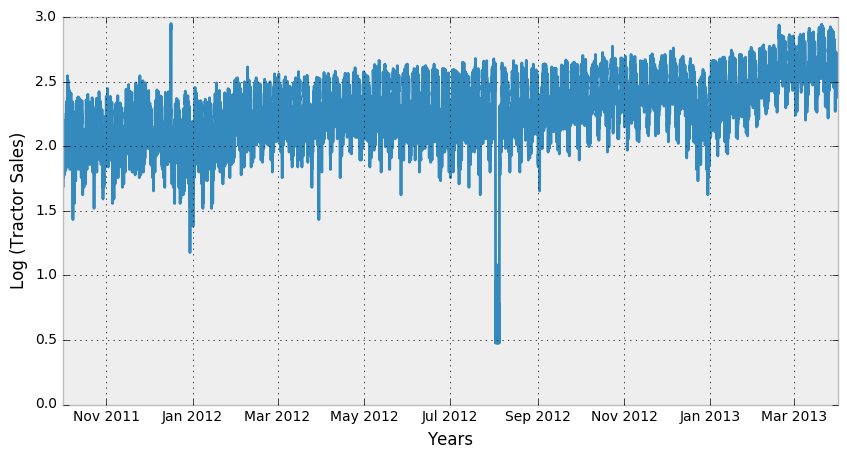

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(newtrain))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

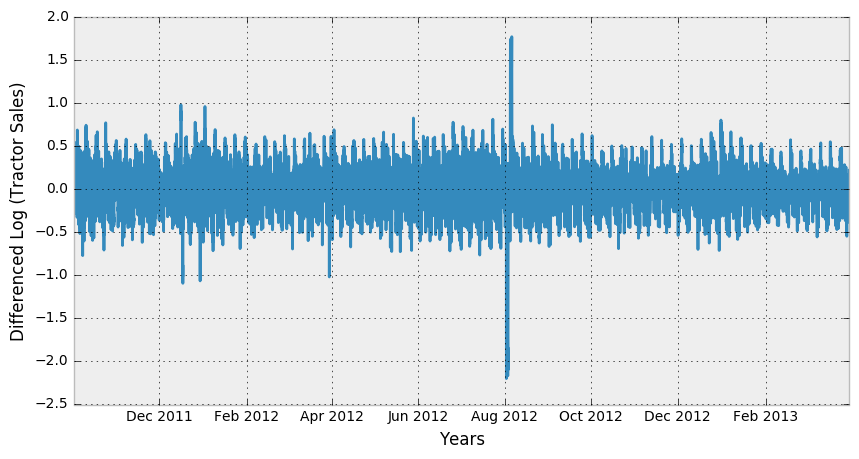

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(newtrain).diff(periods=30))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [13]:
sales_ts_log = np.log10(newtrain)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

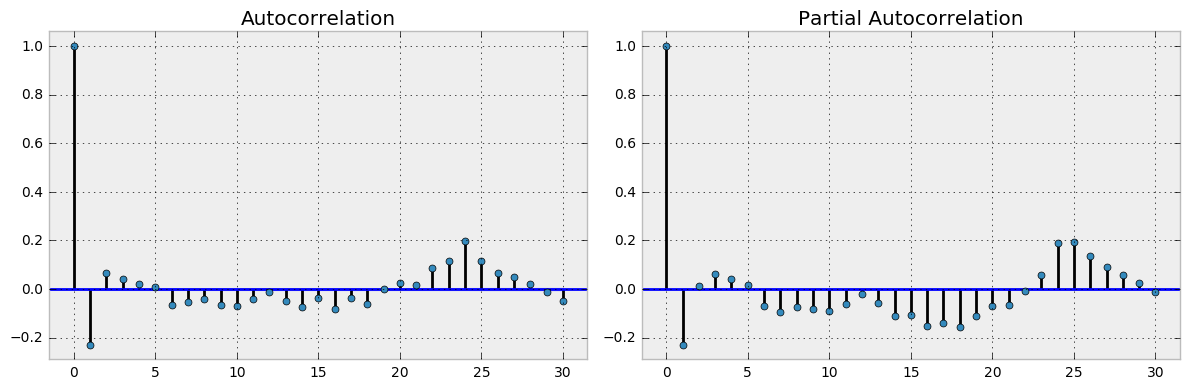

In [14]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [16]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 model - AIC:-26775.444133037556


In [17]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [18]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                13152
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               13392.722
Date:                            Sun, 15 Oct 2017   AIC                         -26775.444
Time:                                    20:08:58   BIC                         -26738.022
Sample:                                10-01-2011   HQIC                        -26762.948
                                     - 03-31-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3270      0.010     32.349      0.000       0.307       0.347
ma.L1         -0.7080      0.008   

In [22]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=2928, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=2928, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [37]:
n_steps = 2928
idx = pd.date_range(newtrain.index[-1], periods=n_steps,freq='H')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx+1, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx+1, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2013-04-01 00:00:00,421.536362,284.757690,624.014418,284.757690,624.014418
2013-04-01 01:00:00,403.551215,254.415265,640.109323,254.415265,640.109323
2013-04-01 02:00:00,365.827232,221.787554,603.413317,221.787554,603.413317
2013-04-01 03:00:00,332.283913,195.361346,565.171163,195.361346,565.171163
2013-04-01 04:00:00,305.713598,174.885312,534.411971,174.885312,534.411971


In [38]:
fc_all.tail()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2013-07-31 19:00:00,468.684838,0.050380,4.360183e+06,0.050380,4.360183e+06
2013-07-31 20:00:00,466.882620,0.050109,4.350113e+06,0.050109,4.350113e+06
2013-07-31 21:00:00,449.190707,0.048136,4.191721e+06,0.048136,4.191721e+06
2013-07-31 22:00:00,430.351514,0.046046,4.022108e+06,0.046046,4.022108e+06
2013-07-31 23:00:00,409.624177,0.043761,3.834287e+06,0.043761,3.834287e+06


In [35]:
print( type(fc_all['forecast']))

<class 'pandas.core.series.Series'>


In [40]:
test['\ufeffID'] = test['\ufeffID'].astype(str)
test['\ufeffID'] = test['\ufeffID'].apply(dateparse)

In [41]:
newtest = test.set_index('\ufeffID')

In [42]:
print(newtest.tail())

                     Count
﻿ID                       
2013-07-31 19:00:00    NaN
2013-07-31 20:00:00    NaN
2013-07-31 21:00:00    NaN
2013-07-31 22:00:00    NaN
2013-07-31 23:00:00    NaN


In [43]:
newtest['Count'] = fc_all

In [44]:
print(newtest)

                          Count
﻿ID                            
2013-04-01 00:00:00  421.536362
2013-04-01 01:00:00  403.551215
2013-04-01 02:00:00  365.827232
2013-04-01 03:00:00  332.283913
2013-04-01 04:00:00  305.713598
2013-04-01 05:00:00  294.871289
2013-04-01 06:00:00  291.337319
2013-04-01 07:00:00  287.889456
2013-04-01 08:00:00  289.387662
2013-04-01 09:00:00  304.870809
2013-04-01 10:00:00  323.014685
2013-04-01 11:00:00  345.261266
2013-04-01 12:00:00  354.251353
2013-04-01 13:00:00  362.909131
2013-04-01 14:00:00  397.751984
2013-04-01 15:00:00  436.944692
2013-04-01 16:00:00  474.549746
2013-04-01 17:00:00  491.867723
2013-04-01 18:00:00  497.790644
2013-04-01 19:00:00  503.733012
2013-04-01 20:00:00  501.124423
2013-04-01 21:00:00  475.703694
2013-04-01 22:00:00  449.014816
2013-04-01 23:00:00  420.117334
2013-04-02 00:00:00  409.468651
2013-04-02 01:00:00  399.712001
2013-04-02 02:00:00  364.738643
2013-04-02 03:00:00  332.061060
2013-04-02 04:00:00  305.778431
2013-04-

In [47]:
test['Count'] = newtest['Count']

In [49]:
newtest2 = newtest

In [50]:
newtest2.reset_index()

,﻿ID,Count
0,2013-04-01 00:00:00,421.536362
1,2013-04-01 01:00:00,403.551215
2,2013-04-01 02:00:00,365.827232
3,2013-04-01 03:00:00,332.283913
4,2013-04-01 04:00:00,305.713598
5,2013-04-01 05:00:00,294.871289
6,2013-04-01 06:00:00,291.337319
7,2013-04-01 07:00:00,287.889456
8,2013-04-01 08:00:00,289.387662
9,2013-04-01 09:00:00,304.870809


In [51]:
test['Count'] = newtest2['Count']

In [53]:
newtest2.to_csv('student_hunt_first.csv')

In [55]:
newtest2.reset_index()

,﻿ID,Count
0,2013-04-01 00:00:00,421.536362
1,2013-04-01 01:00:00,403.551215
2,2013-04-01 02:00:00,365.827232
3,2013-04-01 03:00:00,332.283913
4,2013-04-01 04:00:00,305.713598
5,2013-04-01 05:00:00,294.871289
6,2013-04-01 06:00:00,291.337319
7,2013-04-01 07:00:00,287.889456
8,2013-04-01 08:00:00,289.387662
9,2013-04-01 09:00:00,304.870809


In [56]:
test['Count'] = newtest2['Count']

In [57]:
test

,﻿ID,Count
0,2013-04-01 00:00:00,NaN
1,2013-04-01 01:00:00,NaN
2,2013-04-01 02:00:00,NaN
3,2013-04-01 03:00:00,NaN
4,2013-04-01 04:00:00,NaN
5,2013-04-01 05:00:00,NaN
6,2013-04-01 06:00:00,NaN
7,2013-04-01 07:00:00,NaN
8,2013-04-01 08:00:00,NaN
9,2013-04-01 09:00:00,NaN


In [61]:
for i in range(len(test)):
    test['Count'][i] = newtest2['Count'][i]

In [62]:
test

,﻿ID,Count
0,2013-04-01 00:00:00,421.536362
1,2013-04-01 01:00:00,403.551215
2,2013-04-01 02:00:00,365.827232
3,2013-04-01 03:00:00,332.283913
4,2013-04-01 04:00:00,305.713598
5,2013-04-01 05:00:00,294.871289
6,2013-04-01 06:00:00,291.337319
7,2013-04-01 07:00:00,287.889456
8,2013-04-01 08:00:00,289.387662
9,2013-04-01 09:00:00,304.870809
